In [1]:
import pandas as pd
from sklearn.svm import SVC
import numpy as np
from matplotlib import pyplot as plt
from sklearn import linear_model

In [3]:
cols = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'flower']
print(cols)
# print(x_cols)
iris_data = pd.read_csv("data/iris.data.txt", header=None, names=cols)
iris_data

['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'flower']


,sepal_length,sepal_width,petal_length,petal_width,flower
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
iris_data['flower'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [4]:
iris_data['bflower']=[(0 if (flw=='Iris-setosa')else 1\
                      if (flw=='Iris-versicolor')else 2)\
                      for flw in iris_data['flower']]

In [5]:
setosa = iris_data[iris_data['flower']=='Iris-setosa']

In [6]:
versicolor =iris_data[iris_data['flower']=='Iris-versicolor']

In [7]:
virginica =iris_data[iris_data['flower']=='Iris-virginica']

In [8]:
# setosa
# versicolor
# virginica

In [2]:
iris_data.columns


NameError: name 'iris_data' is not defined

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.style
import matplotlib as mpl
import pandas as pd
mpl.style.use('classic')

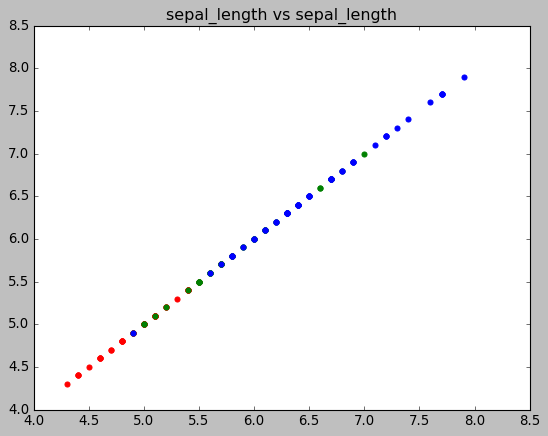

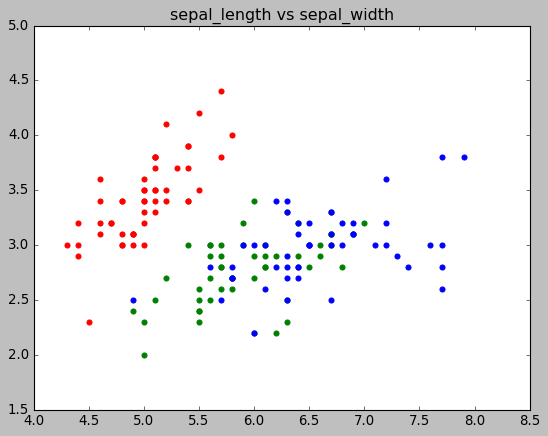

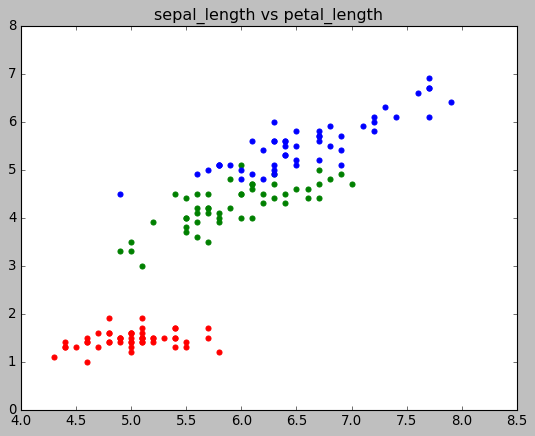

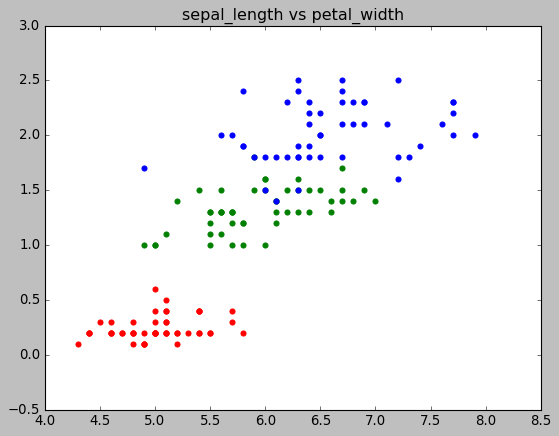

In [11]:
j=0
for i in range(4):
    plt.scatter(setosa[iris_data.columns[j]],setosa[iris_data.columns[i]],color='r')
    plt.scatter(versicolor[iris_data.columns[j]],versicolor[iris_data.columns[i]],color='g')
    plt.scatter(virginica[iris_data.columns[j]],virginica[iris_data.columns[i]],color='b')
    plt.title("{0} vs {1}".format(iris_data.columns[j],iris_data.columns[i]))
    plt.show()

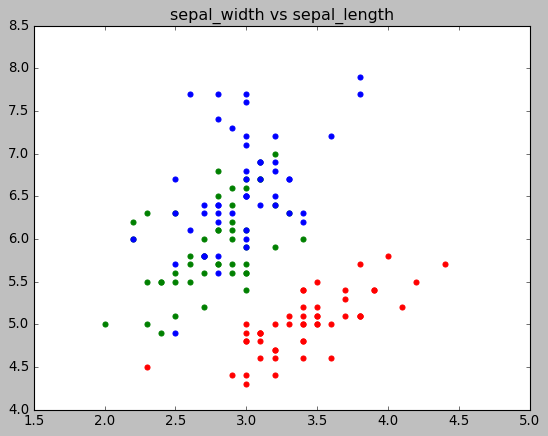

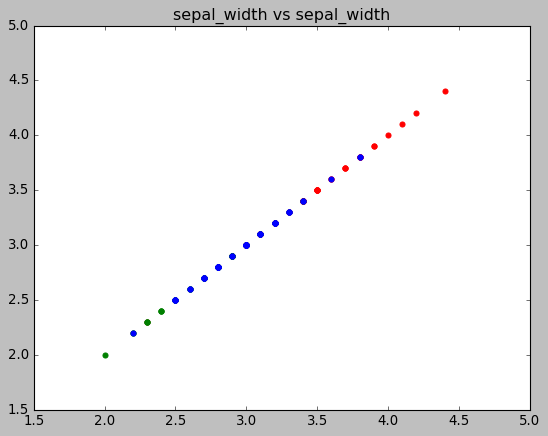

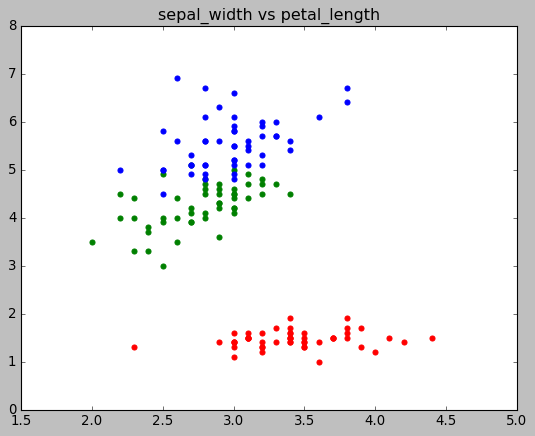

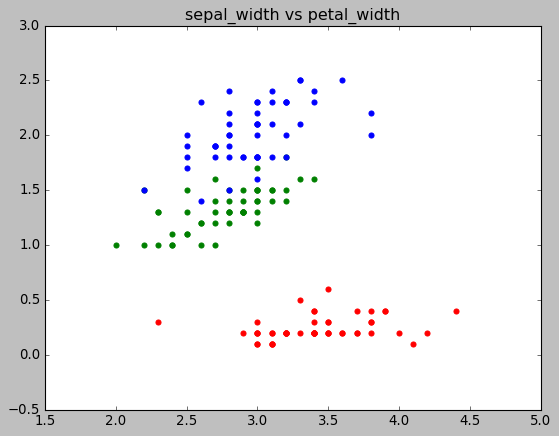

In [12]:
j=1
for i in range(4):
    plt.scatter(setosa[iris_data.columns[j]],setosa[iris_data.columns[i]],color='r')
    plt.scatter(versicolor[iris_data.columns[j]],versicolor[iris_data.columns[i]],color='g')
    plt.scatter(virginica[iris_data.columns[j]],virginica[iris_data.columns[i]],color='b')
    plt.title("{0} vs {1}".format(iris_data.columns[j],iris_data.columns[i]))

    plt.show()

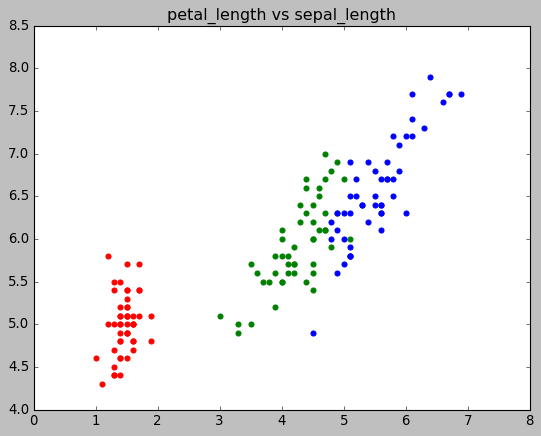

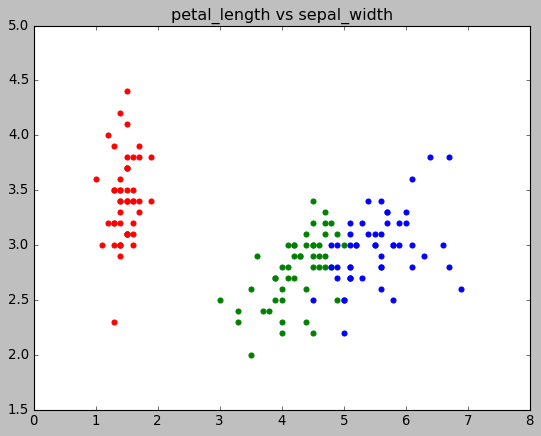

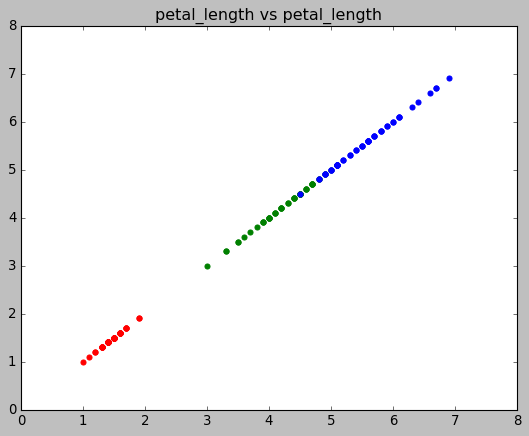

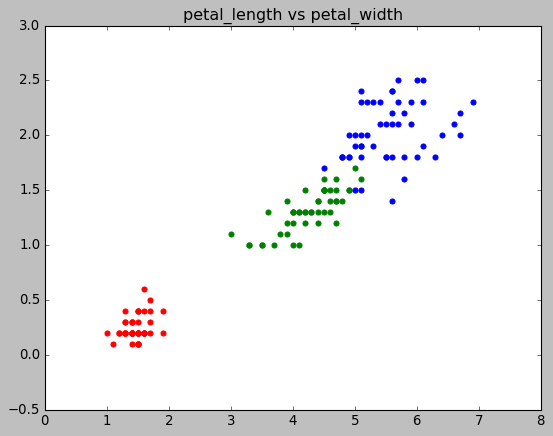

In [13]:
j=2
for i in range(4):
    plt.scatter(setosa[iris_data.columns[j]],setosa[iris_data.columns[i]],color='r')
    plt.scatter(versicolor[iris_data.columns[j]],versicolor[iris_data.columns[i]],color='g')
    plt.scatter(virginica[iris_data.columns[j]],virginica[iris_data.columns[i]],color='b')
    plt.title("{0} vs {1}".format(iris_data.columns[j],iris_data.columns[i]))
    plt.show()

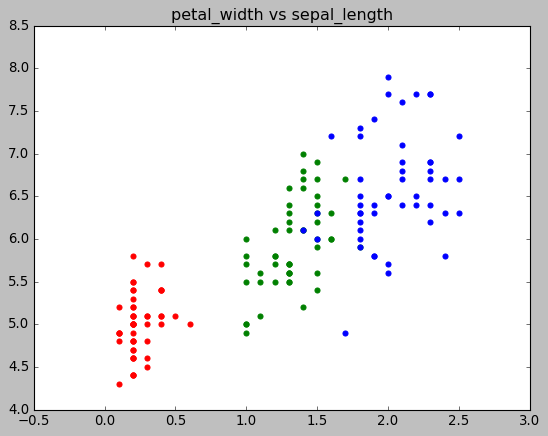

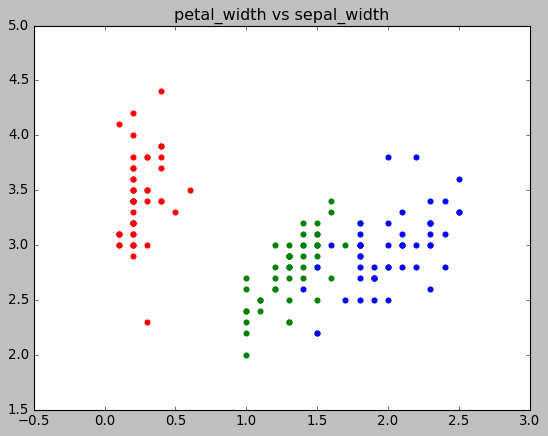

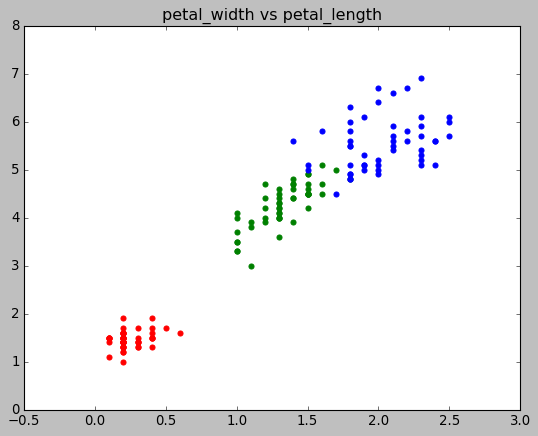

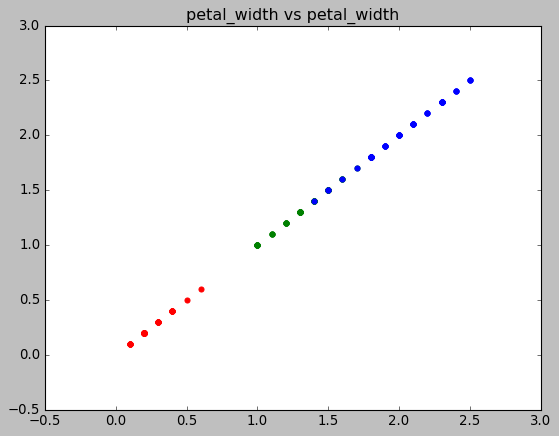

In [14]:
j=3
for i in range(4):
    plt.scatter(setosa[iris_data.columns[j]],setosa[iris_data.columns[i]],color='r')
    plt.scatter(versicolor[iris_data.columns[j]],versicolor[iris_data.columns[i]],color='g')
    plt.scatter(virginica[iris_data.columns[j]],virginica[iris_data.columns[i]],color='b')
    plt.title("{0} vs {1}".format(iris_data.columns[j],iris_data.columns[i]))
    plt.show()

## we observed
## petal_width VS petal_length is best(j=2)

In [15]:
iris_data.corr()

,sepal_length,sepal_width,petal_length,petal_width,bflower
sepal_length,1.000000,-0.109369,0.871754,0.817954,0.782561
sepal_width,-0.109369,1.000000,-0.420516,-0.356544,-0.419446
petal_length,0.871754,-0.420516,1.000000,0.962757,0.949043
petal_width,0.817954,-0.356544,0.962757,1.000000,0.956464
bflower,0.782561,-0.419446,0.949043,0.956464,1.000000


### with 3 features we can use sepal_length too

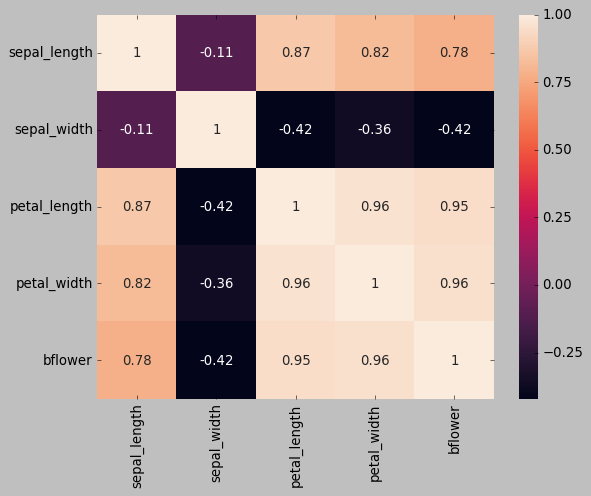

In [16]:
import seaborn as sb
from sklearn import metrics
sb.heatmap(iris_data.corr(),annot=True)

In [17]:
ip=iris_data[['petal_length','petal_width']]
op=iris_data['bflower']
from sklearn.model_selection import train_test_split
ip_train,ip_test,op_train,op_test=\
train_test_split(ip,op,test_size=0.3,random_state=3)

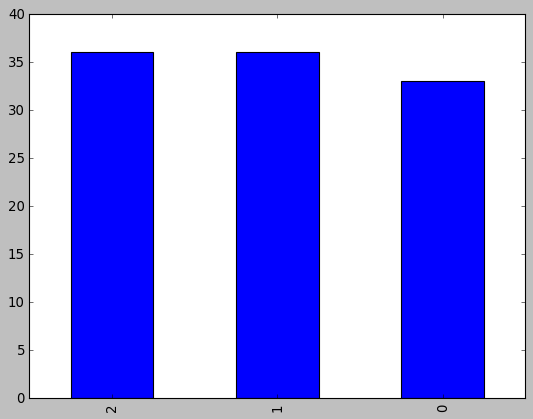

In [18]:
op_train.value_counts().plot(kind='bar')

In [19]:
from sklearn.tree import DecisionTreeClassifier

In [20]:
# for regression use DescisiontreeRegressor

decisiontree= DecisionTreeClassifier(criterion= 'entropy',\
                                     max_depth=6)
obtained_tree= decisiontree.fit(ip_train,op_train)
print(decisiontree.classes_)


[0 1 2]


# Prediction

In [21]:
obtained_tree.predict([[3,5]])

array([2], dtype=int64)

In [22]:
predicted=obtained_tree.predict(ip)

In [23]:
import pydotplus as pp
from io import StringIO

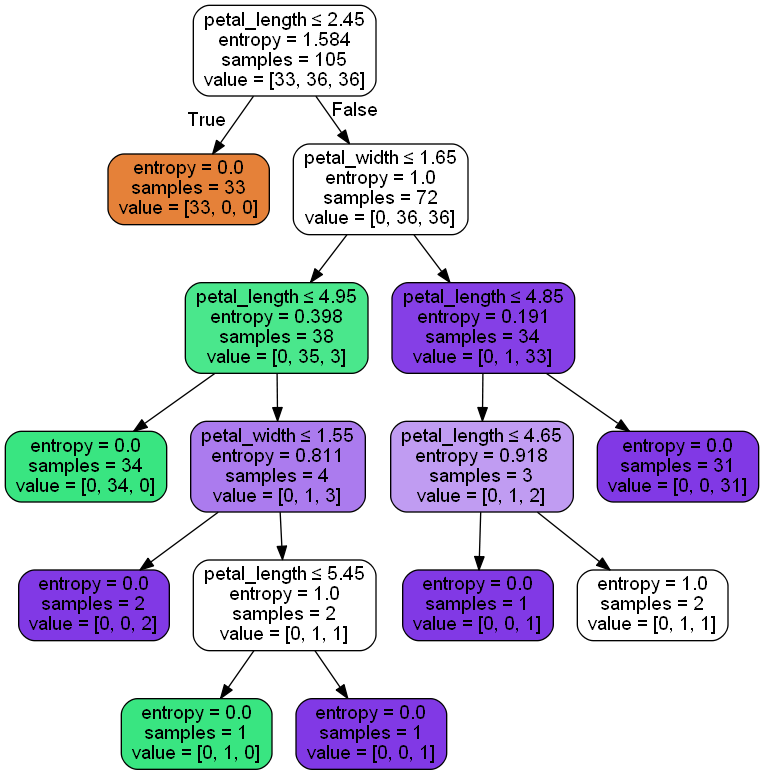

In [24]:
import os
os.environ["PATH"]+=os.pathsep +\
'C:\\Program Files (x86)\\Graphviz2.38\\bin'
from sklearn.tree import export_graphviz
from IPython.display import Image

DecisionTreeImg = StringIO()
export_graphviz(obtained_tree,out_file=DecisionTreeImg,
               filled=True,rounded=True,
               feature_names=["petal_length",
                             "petal_width"],
               special_characters=True)

graph=pp.graph_from_dot_data(DecisionTreeImg.getvalue())
Image(graph.create_png())

# Confusion Matrix

In [37]:
from sklearn.metrics import confusion_matrix
actual = iris_data['bflower']
pred = obtained_tree.predict(ip)
confusion_matrix(actual,pred)

array([[50,  0,  0],
       [ 0, 49,  1],
       [ 0,  1, 49]], dtype=int64)

In [38]:
from sklearn.metrics import classification_report
print(classification_report(actual,pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.98      0.98      0.98        50
           2       0.98      0.98      0.98        50

    accuracy                           0.99       150
   macro avg       0.99      0.99      0.99       150
weighted avg       0.99      0.99      0.99       150



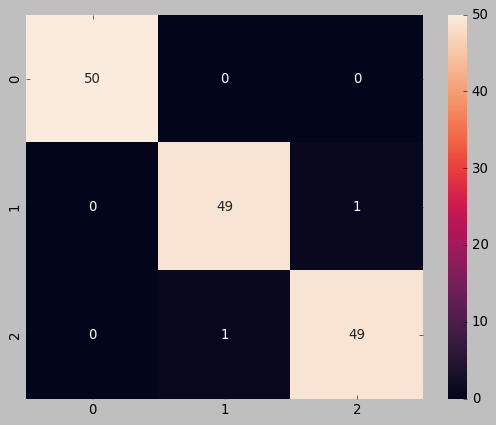

In [39]:
sb.heatmap(metrics.confusion_matrix(actual,pred),annot=True)

# Contour Mapping

Text(0.5, 1.0, 'petal_length vs petal_width')

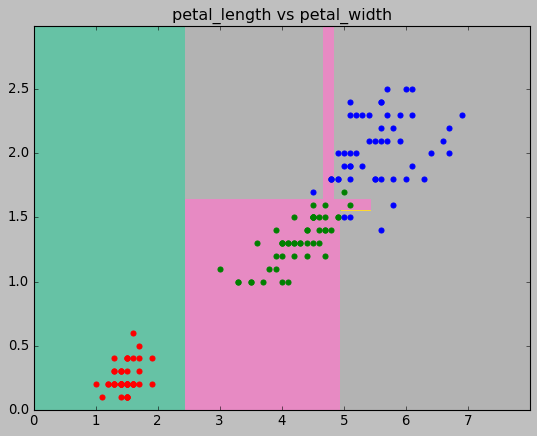

In [26]:
x_min,x_max=0,8
y_min,y_max=0,3
ary1= np.arange(x_min,x_max,0.001)
ary2= np.arange(y_min,y_max,0.001)

#MESH GRID
xx,yy=np.meshgrid(ary1,ary2)
xx_lin=xx.ravel()
yy_lin=yy.ravel()
c_xy=np.c_[xx_lin,yy_lin]#combining xx and yy
z = obtained_tree.predict(c_xy)#predict the range of predictions
z=z.reshape(xx.shape)#reshaping  as the shape of xx

#Contour fills the area. It requires 2 dim array
plt.contourf(xx,yy,z,cmap=plt.cm.Set2)


plt.scatter(setosa[iris_data.columns[2]],setosa[iris_data.columns[3]],color='r')
plt.scatter(versicolor[iris_data.columns[2]],versicolor[iris_data.columns[3]],color='g')
plt.scatter(virginica[iris_data.columns[2]],virginica[iris_data.columns[3]],color='b')
plt.xlabel
plt.title("{0} vs {1}".format(iris_data.columns[2],iris_data.columns[3]))

# SVM model

In [27]:
from sklearn.svm  import SVC
SVCClassifier = SVC(kernel='linear',C=5)
SVCModel= SVCClassifier.fit(ip_train,op_train)

In [ ]:
z = SVCModel.predict(c_xy)#predict the range of predictions
z=z.reshape(xx.shape)#reshaping  as the shape of xx

#Contour fills the area. It requires 2 dim array
plt.contourf(xx,yy,z,cmap=plt.cm.Set2)

plt.scatter(setosa[iris_data.columns[2]],setosa[iris_data.columns[3]],color='r')
plt.scatter(versicolor[iris_data.columns[2]],versicolor[iris_data.columns[3]],color='g')
plt.scatter(virginica[iris_data.columns[2]],virginica[iris_data.columns[3]],color='b')
plt.xlabel
plt.title("{0} vs {1}".format(iris_data.columns[2],iris_data.columns[3]))

# ML on IRIS Data Set

In [ ]:
ip=iris_data[['petal_length','petal_width']]
op=iris_data['flower']
from sklearn.model_selection import train_test_split
ip_train,ip_test,op_train,op_test=\
train_test_split(ip,op,test_size=0.20,random_state=3)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
# for regression use DescisiontreeRegressor

decisiontree= DecisionTreeClassifier(criterion= 'entropy',\
                                     max_depth=6)
obtained_tree= decisiontree.fit(ip_train,op_train)
print(decisiontree.classes_)


In [ ]:
plength=input('Enter Petal Length')
pwidth=input('Enter Petal Width')
print("Your Flower is",obtained_tree.predict([[plength,pwidth]])[0])

# K-Fold cross validation

In [28]:
from sklearn.svm import SVC
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.style
matplotlib.style.use('classic')


In [29]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=5)


In [30]:
def get_score(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    return model.score(X_test, y_test)

In [31]:
from sklearn.model_selection import StratifiedKFold
folds = StratifiedKFold(n_splits=10)
scores_svm = []
scores_dt = []

for train_index, test_index in folds.split(ip,op):
    X_train, X_test, y_train, y_test = ip_train, ip_test, \
                                       op_train, op_test
    scores_svm.append(get_score(SVCModel, X_train, X_test, y_train, y_test))
    scores_dt.append(get_score(obtained_tree, X_train, X_test, y_train, y_test))

In [32]:
scores_svm

[0.9777777777777777,
 0.9777777777777777,
 0.9777777777777777,
 0.9777777777777777,
 0.9777777777777777,
 0.9777777777777777,
 0.9777777777777777,
 0.9777777777777777,
 0.9777777777777777,
 0.9777777777777777]

In [33]:
scores_dt

[0.9555555555555556,
 0.9555555555555556,
 0.9555555555555556,
 0.9555555555555556,
 1.0,
 0.9555555555555556,
 1.0,
 1.0,
 1.0,
 1.0]

# On SVC Model

In [34]:
from sklearn.model_selection import cross_val_score

In [35]:
cross_val_score(SVCModel, ip_test, op_test,cv=10).reshape(-1,1)

array([[1.        ],
       [1.        ],
       [0.83333333],
       [1.        ],
       [1.        ],
       [0.75      ],
       [1.        ],
       [0.66666667],
       [1.        ],
       [1.        ]])

# On Decision Tree

In [36]:
cross_val_score(obtained_tree, ip_test,op_test,cv=10).reshape(-1,1)

array([[1.        ],
       [1.        ],
       [0.5       ],
       [1.        ],
       [1.        ],
       [0.75      ],
       [1.        ],
       [0.66666667],
       [1.        ],
       [1.        ]])